# dependencias


In [ ]:
!pip install openai
!pip install -U bitsandbytes
!pip install transformers
!pip install -U peft
!pip install -U accelerate
!pip install -U trl
!pip install datasets
!pip install sentencepiece


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 695.3/731.7 MB 2.6 MB/s eta 0:00:14

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.1/267.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI  # Importa la clase OpenAI para interactuar con el modelo de lenguaje


# Establece la dirección y la clave de API para el cliente de OpenAI
clientIA = OpenAI(base_url="http://192.168.50.219:1234/v1", api_key="not-needed")

# Inicializa el historial global de conversaciones con un mensaje de sistema
global_history = [
    {"role": "system", "content": f'''proporciona la información relacionada con el texto en particular en el siguiente formato CSV:

- Cada fila debe representar una pregunta y su correspondiente respuesta, junto con una etiqueta que describa el tipo de pregunta.
- El formato del archivo CSV debe ser el siguiente: Pregunta,Respuesta,Etiqueta.
- Asegúrate de incluir todo el contenido relevante que puedas sobre el texto en el archivo CSV, siguiendo el Formato de Ejemplo.
- La respuesta tiene que ser solo el Formato de Ejemplo.

Formato de Ejemplo:

Pregunta,Respuesta,Etiqueta
"¿Quién es el personaje principal de 'Drácula'?","El personaje principal de 'Drácula' es el Conde Drácula, un vampiro que vive en Transilvania.","Personaje principal"
"¿Qué motiva al Conde Drácula a viajar a Londres?","El Conde Drácula viaja a Londres en busca de sangre fresca y para escapar de su pasado en Transilvania.","Motivación"

'''}
]

def chat_bot(prompt):
    global global_history

    # Agrega el mensaje del usuario al historial global
    global_history.append({"role": "user", "content": prompt})

    # Solicita una respuesta al modelo de lenguaje de OpenAI utilizando el historial global como contexto
    completion = clientIA.chat.completions.create(
        model="local-model",
        messages=global_history,
        max_tokens=950,
        temperature=1
    )

    # Obtiene la respuesta del asistente del chat del objeto de completado
    new_message = completion.choices[0].message.content

    # Agrega la respuesta del asistente al historial global
    global_history.append({"role": "assistant", "content": new_message})

    return new_message

In [ ]:
def count_history(global_history):
  n = 0
  for count in global_history:
    n= n+1
  return n

In [ ]:
global_history = global_history[:-2]

In [ ]:
global_history

[]

In [ ]:
import pandas as pd
from io import StringIO
Ruta_Archivo = "/content/Dracula_BramStoker.txt"
# Inicializa un DataFrame vacío
df = pd.DataFrame(columns=['Pregunta', 'Respuesta', 'Etiqueta'])

def process_text(filename):
  with open(filename, 'r') as f:
    text = f.read()
  global df
  # Divide el texto en bloques de 1000 palabras
  blocks = [text[i:i+3000] for i in range(0, len(text), 3000)]
  # Procesa cada bloque de texto por separado
  for block in blocks:
    respuestas_chatbot = chat_bot(block)
    cantidad = count_history(global_history)
    print(f'Cantidad de elementos en el historial: {cantidad}')
    if cantidad >= 9:
      print(f'eliminando con: {count_history(global_history)}')
      del global_history[3:]
    # Aquí
    try:
        # Usa StringIO para convertir el texto en un archivo en memoria
        data = StringIO(respuestas_chatbot)

        # Lee el archivo en un DataFrame
        df_nuevo = pd.read_csv(data, quotechar='"')

        # Agrega las nuevas respuestas al DataFrame existente

        df = pd.concat([df, df_nuevo], ignore_index=True)
        print(df)
    except Exception as e:
        print(f"Hubo un error al agregar la respuesta al DataFrame: {e}")
        print("Vamos a preguntar nuevamente al bot.")
        respuestas_chatbot = chat_bot(block)
        del global_history[5:]

# Llama a la función con el nombre del archivo de texto
process_text(Ruta_Archivo)

# Muestra el DataFrame
print(df)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
374  En qué países se encuentra la historia del vam...   
375        Qué habilidades muestra Drácula en la obra?   
376  Que horas tiene Drácula limitación de movimiento?   
377    Con qué elemento natural está sometido Drácula?   

                                             Respuesta  \
0                             Bram Stoker,(1847-1912).   
1                                            Bistritz.   
2    Primer día de mayo o primer mayo al salir de M...   
3    Paisajes bellos con pueblitos y castillos en c...   
4    Largas mangas blancas y anchos cinturones con ...   
..                                                 ...   
373  Toma de manos para expresar solidaridad y prom...   
374  Grecia, Roma antigua, Alemania, Francia, India...   
375  Transmutación en lobo, aparición en lugares me...   
376  Mediodía o la precisa hora de puesta del sol o...   
377                                               Día.   

   

In [ ]:
df

,Pregunta,Respuesta,Etiqueta
0,Quien es autor de 'Drácula'?,"Bram Stoker,(1847-1912).",Autor
1,En que lugar empieza relato de Jonathan Harker...,Bistritz.,Lugar
2,Cual es la fecha de inicio del viaje de Jonath...,Primer día de mayo o primer mayo al salir de M...,Fecha
3,Descripción del viaje de Jonathan desde Klause...,Paisajes bellos con pueblitos y castillos en c...,Landscape
4,Qué atuendo llevaban las mujeres según Jonatha...,Largas mangas blancas y anchos cinturones con ...,Dress description
...,...,...,...
600,Cómo muere Quincey Morris en el texto?,Con una herida de bala en el corazón y al mism...,Muerte de Quincey Morris
601,En qué parte del libro aparece el indice?,"Al final del relato de Bram Stoker 'Drácula', ...",Indice
602,Capitulo donde comienza el diario de Doctor Se...,XXI.,Capítulo
603,En que parte del libro aparece el relato del v...,XXII.,Capítulo


In [ ]:
df.to_csv('/content/dataset_dracula_600.csv',index = False)
df

,Pregunta,Respuesta,Etiqueta
0,Quien es autor de 'Drácula'?,"Bram Stoker,(1847-1912).",Autor
1,En que lugar empieza relato de Jonathan Harker...,Bistritz.,Lugar
2,Cual es la fecha de inicio del viaje de Jonath...,Primer día de mayo o primer mayo al salir de M...,Fecha
3,Descripción del viaje de Jonathan desde Klause...,Paisajes bellos con pueblitos y castillos en c...,Landscape
4,Qué atuendo llevaban las mujeres según Jonatha...,Largas mangas blancas y anchos cinturones con ...,Dress description
...,...,...,...
600,Cómo muere Quincey Morris en el texto?,Con una herida de bala en el corazón y al mism...,Muerte de Quincey Morris
601,En qué parte del libro aparece el indice?,"Al final del relato de Bram Stoker 'Drácula', ...",Indice
602,Capitulo donde comienza el diario de Doctor Se...,XXI.,Capítulo
603,En que parte del libro aparece el relato del v...,XXII.,Capítulo


In [ ]:
df.dropna(inplace=True)
df

,Pregunta,Respuesta,Etiqueta
0,Quien es autor de 'Drácula'?,"Bram Stoker,(1847-1912).",Autor
1,En que lugar empieza relato de Jonathan Harker...,Bistritz.,Lugar
2,Cual es la fecha de inicio del viaje de Jonath...,Primer día de mayo o primer mayo al salir de M...,Fecha
3,Descripción del viaje de Jonathan desde Klause...,Paisajes bellos con pueblitos y castillos en c...,Landscape
4,Qué atuendo llevaban las mujeres según Jonatha...,Largas mangas blancas y anchos cinturones con ...,Dress description
...,...,...,...
600,Cómo muere Quincey Morris en el texto?,Con una herida de bala en el corazón y al mism...,Muerte de Quincey Morris
601,En qué parte del libro aparece el indice?,"Al final del relato de Bram Stoker 'Drácula', ...",Indice
602,Capitulo donde comienza el diario de Doctor Se...,XXI.,Capítulo
603,En que parte del libro aparece el relato del v...,XXII.,Capítulo


In [ ]:
df.to_csv('/content/dataset_dracula_600_NoNaN.csv',index = False)

# ANEXO

In [ ]:
Ruta_Archivo = "/content/Dracula_BramStoker.txt"

def process_text(filename):
  with open(filename, 'r') as f:
    text = f.read()

  # Divide el texto en bloques de 1000 palabras
  blocks = [text[i:i+1000] for i in range(0, len(text), 1000)]
  n = 0
  # Procesa cada bloque de texto por separado
  for block in blocks:
    n = n + 1
    respuestas_chatbot = chat_bot(block)
    if n >= 6:
      del global_history[3:]
      n = 0
    # Aquí
    print(respuestas_chatbot)

# Llama a la función con el nombre del archivo de texto
process_text(Ruta_Archivo)


Pregunta,Respuesta,Etiqueta
"Qué fecha marca el comienzo del viaje de Jonathan Harker hacia Transilvania?","El viaje de Jonathan Harker hacia Transilvania comienza el 3 de mayo.","Inicio viaje"
"Desde dónde sale Jonathan Harker y para qué destino viaja?","Jonathan HARKER sale desde Münich para ir a Transilvania, debido a una fecha fijada con su cliente, el Conde Drácula.","Salida/Destino"

Pregunta,Respuesta,Etiqueta
"¿Qué plato nacional se come en Klausenburg?","El plato nacional que se come en Klausenburg es el paprika hendl (pollo con pimentón rojo), que Jonathan Harker encontró muy sabroso y lo deseaba repetir.","Comida/Bebida"

Pregunta,Respuesta,Etiqueta
"¿Qué nacionalidades habitan Transilvania?","Transilvania posee cuatro nacionalidades principales: sajones en el sur; mezclados con ellos los valacos, descendientes de los dacios; magiares en el oeste y escequelios en el este y el norte.","Nacionalidades"

Pregunta,Respuesta,Etiqueta
"Qué sueños tuvo Jonathan Harker al principio 


---

# **DATASET MAKER**

En este proceso, tomamos el texto que deseamos convertir en un conjunto de datos (dataset) y lo transformamos al formato de Lora, que consiste en las columnas "pregunta", "respuesta" y "etiqueta". Para lograr esto, utilizaremos otro chatbot auxiliar que generará las preguntas y las irá agregando a un archivo CSV.

Cada consulta al chatbot tiene un límite máximo de **N tokens**. Cuanto menor sea esta cantidad, más precisas serán las preguntas, pero también se generará una mayor cantidad de consultas.



In [ ]:
import pandas as pd

df = pd.read_csv("/content/dataset_dracula_600_NoNaN.csv")


In [ ]:
# prompt: cambia el nombre de las primeras 3 columnas de df a Q,A y class

df.columns = ['Q', 'A', 'class']
df


,Q,A,class
0,Quien es autor de 'Drácula'?,"Bram Stoker,(1847-1912).",Autor
1,En que lugar empieza relato de Jonathan Harker...,Bistritz.,Lugar
2,Cual es la fecha de inicio del viaje de Jonath...,Primer día de mayo o primer mayo al salir de M...,Fecha
3,Descripción del viaje de Jonathan desde Klause...,Paisajes bellos con pueblitos y castillos en c...,Landscape
4,Qué atuendo llevaban las mujeres según Jonatha...,Largas mangas blancas y anchos cinturones con ...,Dress description
...,...,...,...
553,Cómo muere Quincey Morris en el texto?,Con una herida de bala en el corazón y al mism...,Muerte de Quincey Morris
554,En qué parte del libro aparece el indice?,"Al final del relato de Bram Stoker 'Drácula', ...",Indice
555,Capitulo donde comienza el diario de Doctor Se...,XXI.,Capítulo
556,En que parte del libro aparece el relato del v...,XXII.,Capítulo


In [ ]:
# Supongamos que tienes un DataFrame llamado df
import pandas as pd


# Aplica la función len a cada elemento del DataFrame y luego encuentra el valor máximo
maximo_caracteres = df.astype(str).applymap(len).max()

print(maximo_caracteres)


Q        182
A        393
class     79
dtype: int64


#Modelo

## **Preparación de Datos para el Fine-Tuning**


----------------------------------------------------------------------
Referencia: https://medium.com/@codersama/fine-tuning-mistral-7b-in-google-colab-with-qlora-complete-guide-60e12d437cca

## Pasos para hacer finetuning con QLoRA:

**1. Preparación:**

* **Elige un modelo pre-entrenado compatible con QLoRA:** Puedes encontrar una lista en [https://github.com/artidoro/qlora](https://github.com/artidoro/qlora).
* **Reúne tu conjunto de datos:** Asegúrate de que esté etiquetado y formateado correctamente.
* **Define tu tarea:** ¿Qué quieres que el modelo aprenda a hacer?

**2. Finetuning:**

* **Instala las herramientas necesarias:** TensorFlow, QLoRA y otras dependencias.
* **Configura el entrenamiento:** Define los parámetros como la tasa de aprendizaje, el número de epochs y el tamaño del batch.
* **Entrena el modelo:** Usa un script de entrenamiento para ejecutar el proceso de finetuning.

**3. Evaluación:**

* **Evalúa el rendimiento del modelo:** Usa métricas relevantes para tu tarea.
* **Ajusta los parámetros:** Si es necesario, modifica la configuración del entrenamiento para mejorar el rendimiento.

**Recursos adicionales:**

* [https://deci.ai/blog/how-to-instruction-tune-a-base-llm-using-qlora-with-decilm-6b/](https://deci.ai/blog/how-to-instruction-tune-a-base-llm-using-qlora-with-decilm-6b/)
* [https://github.com/artidoro/qlora](https://github.com/artidoro/qlora)
* [https://www.philschmid.de/sagemaker-falcon-qlora](https://www.philschmid.de/sagemaker-falcon-qlora)

**Nota:**

* El proceso puede variar dependiendo del modelo, la tarea y el conjunto de datos.
* Se recomienda consultar la documentación oficial de QLoRA para obtener más información.


In [ ]:
# base model from huggingFace or path to model
base_model = "mistralai/Mistral-7B-Instruct-v0.2"
new_model = "Mistral-7B-Instruct-v0.2-autogenerated-Dracula"

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig,HfArgumentParser,TrainingArguments,pipeline, logging
from peft import LoraConfig, PeftModel, prepare_model_for_kbit_training, get_peft_model
import os,torch
from datasets import load_dataset
from trl import SFTTrainer
import pandas as pd
import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset
import re


# Build Dataset

In [ ]:
# prompt: divide el dataframe df en conjunto de test y train en % de 80 20 usando alguna de las bibliotecas tipicas de IA

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.9, test_size=0.1, random_state=42)


Formato Mistral, Inicio del mensaje o {system} "< s >"

Contenido del Prompt entre [INST] y [/INST] {user}

Finaliza el mensaje "< / s >" {assignt}

In [ ]:

# build training dataset with the right format
df_train['text'] = '<s>[INST]'+ df_train['Q'] +'[/INST]'+ df_train['A'] + 'Class:' + df_train['class'] + '</s>'

# remove columns
df_train=df_train.drop(['Q','A','class'],axis=1)

# convert to dataset object
dataset = ds.dataset(pa.Table.from_pandas(df_train).to_batches())
dataset = Dataset(pa.Table.from_pandas(df_train))
dataset

Dataset({
    features: ['text', '__index_level_0__'],
    num_rows: 502
})

In [ ]:
dataset['text']

['<s>[INST]En que lugar van los personajes a buscar informacion del barco de Dracula?[/INST]Describen los pasos tomados para averiguar sobre el barco y rumbo que siguió el conde Drácula al huir.Class:Busqueda barco vampiro</s>',
 '<s>[INST]Cual es la reacción de Arthur al ver a su muerta en el libro?[/INST]Lo encuentra temblando y sacudido con duda que luego desaparece.Class:Emociones ante muerte</s>',
 '<s>[INST]Al final del pasaje dónde persona refiere operar y extraer parte del cuerpo sin especificarlo del principio, quién hace esta referencia y hacia quien está dirigiendo la conversación?[/INST]Profesor(Drácula) a John Harker.Class:Personaje hablando con otro</s>',
 '<s>[INST]Que situación anticipa van Helsing para Godalming?[/INST]Relata eventos extraños que pueden haber ocurrido y solicita su asistencia en el cementerio de la iglesia para enfrentar algo muy grave.Class:Solicitud a Arthur Godalming</s>',
 '<s>[INST]Desde qué lugar Jonathan Harker envía su último registro?[/INST]Va

# Carga del modelo

La razón por la que se realizan estos pasos en lugar de cargar el modelo directamente es para optimizar el rendimiento y la eficiencia del modelo. El proceso se divide en dos partes principales:

**1. Carga del modelo base con configuración de cuantización:**

* **`load_in_4bit=True`:** Especifica que el modelo se cargará en formato cuantizado de 4 bits. Esto reduce significativamente el tamaño del modelo y mejora la eficiencia de la inferencia.
* **`bnb_4bit_quant_type="nf4"`:** Selecciona el tipo de cuantización de 4 bits a utilizar. Hay diferentes tipos disponibles que ofrecen diferentes compensaciones entre precisión y rendimiento.
* **`bnb_4bit_compute_dtype=torch.bfloat16`:** Define el tipo de dato para la computación interna del modelo. `torch.bfloat16` es un formato de punto flotante de 16 bits que ofrece un buen equilibrio entre precisión y rendimiento.
* **`bnb_4bit_use_double_quant=False`:** Deshabilita la cuantización doble, que no se recomienda para la mayoría de los casos.

**2. Configuración del modelo para un uso eficiente de la memoria:**

* **`model.config.use_cache = False`:** Desactiva el almacenamiento en caché de las matrices de atención, lo que libera memoria.
* **`model.config.pretraining_tp = 1`:** Optimiza el uso de memoria para la capa de atención durante la inferencia.
* **`model.gradient_checkpointing_enable()`:** Reduce la memoria necesaria durante el entrenamiento al dividir el cálculo de gradientes en pasos más pequeños.

En resumen, estos pasos se realizan para:

* **Reducir el tamaño del modelo:** La cuantización de 4 bits reduce significativamente el tamaño del modelo, lo que lo hace más adecuado para dispositivos con recursos limitados.
  * **Mejorar la eficiencia de la inferencia:** La cuantización y la configuración del modelo también mejoran la velocidad de inferencia y el consumo de energía.
* **Optimizar el uso de la memoria:** La configuración del modelo reduce la cantidad de memoria necesaria durante la inferencia y el entrenamiento.

Si no se realizan estos pasos, el modelo podría ser demasiado grande, lento o consumir demasiada memoria para ser utilizado en la práctica.


In [ ]:
# **Carga del modelo base con configuración de cuantización:**
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Carga el modelo usando cuantización de 4 bits
    bnb_4bit_quant_type="nf4",  # Tipo de cuantización para cuantización de 4 bits
    bnb_4bit_compute_dtype=torch.bfloat16,  # Tipo de dato de cómputo para la cuantización
    bnb_4bit_use_double_quant=False,  # Deshabilita la cuantización doble
)

model = AutoModelForCausalLM.from_pretrained(
    base_model,  # Nombre del modelo base pre-entrenado
    load_in_4bit=True,
    quantization_config=bnb_config,  # Aplica la configuración de cuantización
    torch_dtype=torch.bfloat16,  # Establece el tipo de dato del modelo
    device_map="auto",  # Distribuye automáticamente el modelo a los dispositivos disponibles
    trust_remote_code=True,  # Permite la carga desde fuentes remotas
)

# **Configura el modelo para un uso eficiente de la memoria:**
model.config.use_cache = False  # Deshabilita el almacenamiento en caché para optimizar la memoria
model.config.pretraining_tp = 1  # Optimiza el uso de memoria para la atención
model.gradient_checkpointing_enable()  # Reduce la huella de memoria para modelos grandes


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/596 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

###Carga del tokenizado


Para el modelo `mistralai/Mistral-7B-Instruct-v0.2` El archivo `tokemizer_config.json` define la configuración para el tokenizador utilizado en el modelo. Permíteme explicarte algunos de los elementos clave en este archivo:

1. **`add_bos_token`** (Agregar Token de Inicio):
   - Si está configurado como `true`, se añadirá un token especial al inicio de cada secuencia.
   - En este caso, el token especial es `<s>` (Inicio del mensaje).

2. **`add_eos_token`** (Agregar Token de Fin):
   - Si está configurado como `false`, no se añadirá un token especial al final de cada secuencia.
   - En este caso, el token especial es `</s>` (Fin del mensaje).

3. **`added_tokens_decoder`** (Decodificador de Tokens Agregados):
   - Define tokens especiales adicionales y sus propiedades.
   - Por ejemplo, `<unk>` representa un token desconocido.

4. **`bos_token`** (Token de Inicio):
   - Especifica el token que se añade al inicio de cada secuencia.
   - En este caso, es `<s>`.

5. **`eos_token`** (Token de Fin):
   - Especifica el token que se añade al final de cada secuencia.
   - En este caso, es `</s>`.

6. **`chat_template`** (Plantilla de Conversación):
   - Define cómo se estructuran los mensajes en una conversación.
   - Los roles de usuario y asistente se alternan, y los mensajes se envuelven con `[INST]` y `[/INST]`.

En resumen, este archivo configura cómo se manejan los tokens especiales, cómo se estructuran las conversaciones y qué tokens adicionales se utilizan. Es parte fundamental del proceso de tokenización en el modelo de lenguaje.


In [ ]:
# Carga el tokenizador para el preprocesamiento de texto usando el modelo base como referencia
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)

# Establece las opciones de relleno para la tokenización
tokenizer.padding_side = 'right'  # Rellena las secuencias por la derecha
tokenizer.pad_token = tokenizer.eos_token  # Usa el token de fin de oración para rellenar
tokenizer.add_eos_token = True  # Agrega explícitamente el token de fin de oración al vocabulario del tokenizador

# Acceso a tokens especiales para referencia (no se usan en el código, pero se comentan para mayor claridad)
tokenizer.bos_token, tokenizer.eos_token


tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

('<s>', '</s>')

#Fine Tunning


Añadiendo adaptadores a las capas del modelo:

In [ ]:
# **Prepara el modelo para el entrenamiento k-bit:**
model = prepare_model_for_kbit_training(model)

# **Define la configuración LORA:**
peft_config = LoraConfig(
    lora_alpha=16,  # Factor de regularización para la descomposición LORA
    lora_dropout=0.1,  # Tasa de dropout para los adaptadores
    r=64,  # Rango de la factorización LORA
    bias="none",  # Desactiva el sesgo en los adaptadores
    task_type="CAUSAL_LM",  # Tipo de tarea del modelo (lenguaje causal)
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj"]  # Capas a las que aplicar LORA
)

# **Aplica la factorización LORA y agrega adaptadores:**
model = get_peft_model(model, peft_config)


Hiperparámetros de entrenamiento:

In [ ]:
# Define los argumentos de entrenamiento con la clase TrainingArguments:
training_arguments = TrainingArguments(
    # Directorio de salida para los resultados del entrenamiento
    output_dir="./results",
    # Número de épocas de entrenamiento
    num_train_epochs=1,
    # Tamaño del lote de entrenamiento por dispositivo
    per_device_train_batch_size=4,
    # Pasos de acumulación de gradiente para optimizar la memoria
    gradient_accumulation_steps=1,
    # Optimizador utilizado para la actualización de pesos (AdamW con paginación de 32 bits)
    optim="paged_adamw_32bit",
    # Frecuencia de guardado de checkpoints del modelo (cada 50 pasos)
    save_steps=50,
    # Frecuencia de registro de información del entrenamiento (cada paso)
    logging_steps=1,
    # Tasa de aprendizaje inicial
    learning_rate=2e-4,
    # Factor de descomposición de peso (regularización L2)
    weight_decay=0.001,
    # Deshabilita la precisión mixta de 16 bits (FP16)
    fp16=False,
    # Deshabilita la precisión mixta de 16 bits con almacenamiento en 16 bits (BF16)
    bf16=False,
    # Norma máxima de gradiente para evitar explosiones de gradiente
    max_grad_norm=0.3,
    # Número máximo de pasos de entrenamiento (-1 para todas las épocas)
    max_steps=-1,
    # Proporción de pasos para el calentamiento de la tasa de aprendizaje
    warmup_ratio=0.03,
    # Agrupa muestras de longitud similar en lotes para mayor eficiencia
    group_by_length=True,
    # Tipo de programador de tasa de aprendizaje (constante en este caso)
    lr_scheduler_type="constant",
)


Configuración de parámetros para el entrenador SFT:

In [ ]:
# Crea una instancia del entrenador SFT
trainer = SFTTrainer(
    # Modelo entrenado a utilizar
    model=model,
    # Dataset de entrenamiento
    train_dataset=dataset,
    # Configuración LORA aplicada
    peft_config=peft_config,
    # Longitud máxima de secuencia (Ninguna especificada)
    max_seq_length=1024,
    # Campo de texto en el dataset
    dataset_text_field="text",
    # Tokenizador del modelo
    tokenizer=tokenizer,
    # Argumentos de entrenamiento definidos anteriormente
    args=training_arguments,
    # Deshabilita el empaquetado de secuencias (opcional)
    packing=False,
)


/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:245: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(


Map:   0%|          | 0/502 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(


Iniciar entrenamiento:

In [ ]:
trainer.train()

You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss
1,4.322800
2,4.370100
3,4.366600
4,3.686200
5,3.600000
6,3.466000
7,3.301200
8,3.015400
9,2.819500
10,2.804800


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


TrainOutput(global_step=126, training_loss=2.1539209310024505, metrics={'train_runtime': 407.1598, 'train_samples_per_second': 1.233, 'train_steps_per_second': 0.309, 'total_flos': 1387544545050624.0, 'train_loss': 2.1539209310024505, 'epoch': 1.0})

#


&


#


&


#


&


#


&


#



In [ ]:
trainer.state.log_history[1]

{'loss': 4.3701, 'learning_rate': 0.0002, 'epoch': 0.02, 'step': 2}

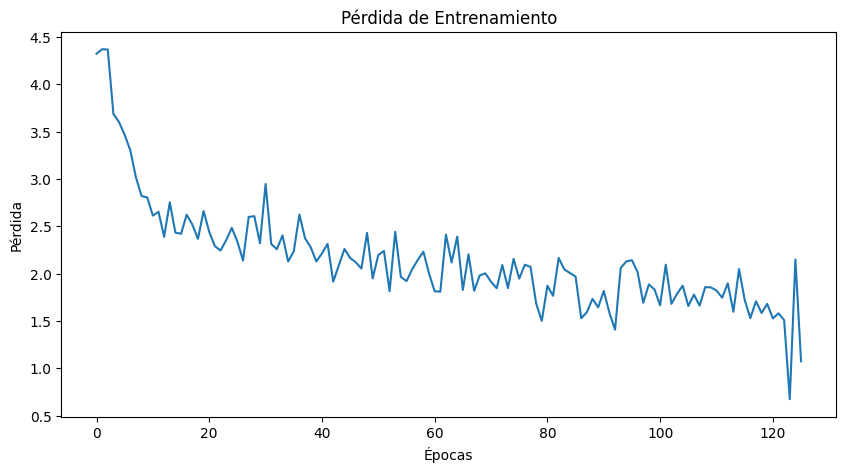

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que 'log_history' es tu trainer.state.log_history
log_history = trainer.state.log_history
# Extrae las pérdidas y las épocas
losses = [entry['loss'] for entry in log_history if 'loss' in entry]

# Crea un gráfico de la pérdida de entrenamiento
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.title('Pérdida de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()


# Save and push the adapter to HF

In [ ]:
# Save the fine-tuned model
trainer.model.save_pretrained(new_model)
model.config.use_cache = True
model.eval()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.1, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=64, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=64, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer): Line

# Login to HF

In [ ]:
from google.colab import userdata
secret_hf = userdata.get('HUGGINGFACE_TOKEN')
!huggingface-cli login --token $secret_hf

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
trainer.model.push_to_hub(new_model,private=True)

adapter_model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/cramirezg/Mistral-7B-Instruct-v0.2-autogenerated-Dracula/commit/e079408286c8e3807ae25757114ea3fa521f9afa', commit_message='Upload model', commit_description='', oid='e079408286c8e3807ae25757114ea3fa521f9afa', pr_url=None, pr_revision=None, pr_num=None)

#CARGA COMPLETA DEL MODELO

In [ ]:
from google.colab import userdata
secret_hf = userdata.get('HUGGINGFACE_TOKEN')
!huggingface-cli login --token $secret_hf

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
import torch

In [ ]:
base_model = "mistralai/Mistral-7B-Instruct-v0.2"
new_model = "cramirezg/Mistral-7B-Instruct-v0.2-autogenerated-Dracula"

In [ ]:
def get_device_map() -> str:
    return 'cuda' if torch.cuda.is_available() else 'cpu'

device = get_device_map()  # 'cpu'

base_model_reload = AutoModelForCausalLM.from_pretrained(
        base_model,
        torch_dtype=torch.bfloat16,
        return_dict=True,
        low_cpu_mem_usage=True,
        device_map=device,
        trust_remote_code=True,
        offload_folder = "offload/",
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# merge adopter with base model
model = PeftModel.from_pretrained(base_model_reload, new_model,offload_folder = "offload/") #cuantizacion
model = model.merge_and_unload()

# Reload tokenizer
tokenizer = AutoTokenizer.from_pretrained(base_model, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

adapter_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/369M [00:00<?, ?B/s]

In [ ]:
#push the model to hub
hf_name=new_model+'_merged'
model.push_to_hub(hf_name,private=True)
tokenizer.push_to_hub(hf_name,private=True)

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:02<?, ?B/s]

Upload 3 LFS files:   0%|          | 0/3 [00:02<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:02<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:02<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/cramirezg/Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged/commit/f1c1c47935e74bc7972d0d69aecb7bc2b2466f17', commit_message='Upload tokenizer', commit_description='', oid='f1c1c47935e74bc7972d0d69aecb7bc2b2466f17', pr_url=None, pr_revision=None, pr_num=None)

-------------

#Quantize GGUF

In [ ]:
# base model from huggingFace or path to model
base_model = "mistralai/Mistral-7B-Instruct-v0.2"
new_model = "Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged"

In [ ]:
repo_id = "cramirezg/" + new_model

In [ ]:
# Clone the llama.cpp repository
!git clone https://github.com/ggerganov/llama.cpp



Cloning into 'llama.cpp'...
remote: Enumerating objects: 21469, done.
remote: Counting objects: 100% (6847/6847), done.
remote: Compressing objects: 100% (225/225), done.
remote: Total 21469 (delta 6730), reused 6662 (delta 6620), pack-reused 14622
Receiving objects: 100% (21469/21469), 24.34 MiB | 7.65 MiB/s, done.
Resolving deltas: 100% (15149/15149), done.


In [ ]:
!cd /content/llama.cpp && LLAMA_CUBLAS=1 make

I ccache not found. Consider installing it for faster compilation.
I llama.cpp build info: 
I UNAME_S:   Linux
I UNAME_P:   x86_64
I UNAME_M:   x86_64
I CFLAGS:    -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG -DGGML_USE_CUDA -I/usr/local/cuda/include -I/usr/local/cuda/targets/x86_64-linux/include  -std=c11   -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wshadow -Wstrict-prototypes -Wpointer-arith -Wmissing-prototypes -Werror=implicit-int -Werror=implicit-function-declaration -pthread -march=native -mtune=native -Wdouble-promotion 
I CXXFLAGS:  -std=c++11 -fPIC -O3 -Wall -Wextra -Wpedantic -Wcast-qual -Wno-unused-function -Wmissing-declarations -Wmissing-noreturn -pthread  -march=native -mtune=native -Wno-array-bounds -Wno-format-truncation -Wextra-semi -I. -Icommon -D_XOPEN_SOURCE=600 -D_GNU_SOURCE -DNDEBUG -DGGML_USE_CUDA -I/usr/local/cuda/include -I/usr/local/cuda/targets/x86_64-linux/include 
I NVCCFLAGS: -std=c++11 -O3 -use_fast_math --forward-unkn

In [ ]:
# Install the requirements
!pip install -r /content/llama.cpp/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 534.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
# Full repo download model


username = repo_id.split('/')[0]
base_model_name = repo_id.split('/')[1]

# Select branch
revision="main"

# Download model
from huggingface_hub import snapshot_download
snapshot_download(repo_id=repo_id, revision=revision, local_dir=f"./{repo_id.replace('/', '_')}")

print(f"Model dir: './{repo_id.replace('/', '_')}'")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.94G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

Model dir: './cramirezg_Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged'


In [ ]:
input_dir = f"./{username}_{base_model_name}"
remove_fp16 = True

# Run quantize
import os
import subprocess

def quantize(model, outbase, outdir):
    llamabase = "/content/llama.cpp"
    ggml_version = "ggufv1"

    if not os.path.isdir(model):
        raise Exception(f"Could not find model dir at {model}")

    if not os.path.isfile(f"{model}/config.json"):
        raise Exception(f"Could not find config.json in {model}")

    os.makedirs(outdir, exist_ok=True)
    fp16 = f"{outdir}/{outbase}.fp16.gguf"

    print(f"Making unquantised GGUF at {fp16}")
    if not os.path.isfile(fp16):
        subprocess.run(f"python {llamabase}/convert.py {model} --outtype f16 --outfile {fp16}", shell=True, check=True)
    else:
        print(f"Unquantised GGUF already exists at: {fp16}")

    print("Making quants")
    for type in ["q4_K_S", "q5_K_M"]:
        outfile = f"{outdir}/{outbase}.{type}.gguf"
        print(f"Making {type} : {outfile}")
        subprocess.run(f"{llamabase}/quantize {fp16} {outfile} {type}", shell=True, check=True)

    if remove_fp16:
        os.remove(fp16)

quantize(input_dir, base_model_name, "quantized")

Making unquantised GGUF at quantized/Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged.fp16.gguf
Making quants
Making q4_K_S : quantized/Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged.q4_K_S.gguf
Making q5_K_M : quantized/Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged.q5_K_M.gguf


In [ ]:
# Push to hub
from huggingface_hub import create_repo, HfApi
api = HfApi()

create_repo(repo_id = f"{username}/{base_model_name}-GGUF", private = True, repo_type = "model", exist_ok = True)
api.upload_folder(
    folder_path="/content/quantized",
    repo_id=f"{username}/{base_model_name}-GGUF"
)

Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged.q5_K_M.gguf:   0%|          | 0.00/5.13G [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged.q4_K_S.gguf:   0%|          | 0.00/4.14G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/cramirezg/Mistral-7B-Instruct-v0.2-autogenerated-Dracula_merged-GGUF/commit/16b4bfe946b84259e467836c8ffa5490961122e1', commit_message='Upload folder using huggingface_hub', commit_description='', oid='16b4bfe946b84259e467836c8ffa5490961122e1', pr_url=None, pr_revision=None, pr_num=None)

# Prueba del modelo


In [ ]:
def build_prompt(question):
  prompt=f"<s>[INST]@ChatBot. {question} [/INST]"
  return prompt

In [ ]:
question = "¿Qué papel juega el Dr. Van Helsing?"
prompt = build_prompt(question)
result = pipe(prompt)

print(result[0]['generated_text'])

In [ ]:
df_test